In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualize satellite images
from skimage.io import imshow # visualize satellite images

from keras.layers import Dense # components of network
from keras.models import Sequential # type of model

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
x_train_set_fpath = '../input/X_test_sat4.csv'
y_train_set_fpath = '../input/y_test_sat4.csv'
print ('Loading Training Data')
X_train = pd.read_csv(x_train_set_fpath)
print ('Loaded 28 x 28 x 4 images')
Y_train = pd.read_csv(y_train_set_fpath)
print ('Loaded labels')

X_train = X_train.as_matrix()
Y_train = Y_train.as_matrix()
print ('We have',X_train.shape[0],'examples and each example is a list of',X_train.shape[1],'numbers with',Y_train.shape[1],'possible classifications.')

#First we have to reshape each of them from a list of numbers to a 28*28*4 image.
X_train_img = X_train.reshape([99999,28,28,4]).astype(float)
print (X_train_img.shape)

Loading Training Data
Loaded 28 x 28 x 4 images
Loaded labels
We have 99999 examples and each example is a list of 3136 numbers with 4 possible classifications.
(99999, 28, 28, 4)


/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


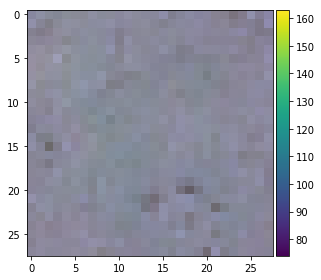

Grassland


In [5]:
#Let's take a look at one image. Keep in mind the channels are R,G,B, and I(Infrared)
ix = 34#Type a number between 0 and 99,999 inclusive
imshow(np.squeeze(X_train_img[ix,:,:,0:3]).astype(float)) #Only seeing the RGB channels
plt.show()
#Tells what the image is
if Y_train[ix,0] == 1:
    print ('Barren Land')
elif Y_train[ix,1] == 1:
    print ('Trees')
elif Y_train[ix,2] == 1:
    print ('Grassland')
else:
    print ('Other')

In [7]:
model = Sequential([
    Dense(4, input_shape=(3136,), activation='softmax')
])

In [8]:
X_train = (X_train-X_train.mean())/X_train.std()

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train,Y_train,batch_size=32, epochs=5, verbose=1, validation_split=0.01)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 12548     
Total params: 12,548
Trainable params: 12,548
Non-trainable params: 0
_________________________________________________________________
Train on 98999 samples, validate on 1000 samples
Epoch 1/5
98999/98999 [==============================] - 34s 340us/step - loss: 0.9499 - acc: 0.6093 - val_loss: 0.7953 - val_acc: 0.6360
Epoch 2/5
98999/98999 [==============================] - 35s 355us/step - loss: 0.7621 - acc: 0.6859 - val_loss: 0.7599 - val_acc: 0.7140
Epoch 3/5
98999/98999 [==============================] - 33s 335us/step - loss: 0.7233 - acc: 0.7050 - val_loss: 0.7351 - val_acc: 0.7200
Epoch 4/5
98999/98999 [==============================] - 32s 328us/step - loss: 0.7002 - acc: 0.7190 - val_loss: 0.6253 - val_acc: 0.7340
Epoch 5/5
98999/98999 [==============================] - 31s 316u

In [10]:
preds = model.predict(X_train[-1000:], verbose=1)

1000/1000 [==============================] - 0s 109us/step


/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/opt/conda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


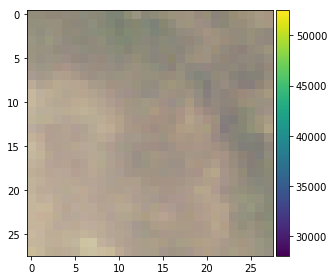

Prediction:
98.1% probability barren land,
0.0% probability trees,
1.3% probability grassland,
0.6% probability other

Ground Truth: Barren Land


In [14]:
ix = 997 #Type a number between 0 and 999 inclusive
imshow(np.squeeze(X_train_img[99999-(1000-ix),:,:,0:3]).astype(float)*255) #Only seeing the RGB channels
plt.show()
#Tells what the image is
print ('Prediction:\n{:.1f}% probability barren land,\n{:.1f}% probability trees,\n{:.1f}% probability grassland,\n{:.1f}% probability other\n'.format(preds[ix,0]*100,preds[ix,1]*100,preds[ix,2]*100,preds[ix,3]*100))

print ('Ground Truth: ',end='')
if Y_train[99999-(1000-ix),0] == 1:
    print ('Barren Land')
elif Y_train[99999-(1000-ix),1] == 1:
    print ('Trees')
elif Y_train[99999-(1000-ix),2] == 1:
    print ('Grassland')
else:
    print ('Other')